# Seaborn - Matrix Plots

Los objetivos de aprendizaje son:

1. Matrix Plots
    - Datos
    - Cramer's V
    - heatmap
    - clustermap

## Datos

Para esta sección utilizaremos los DataFrames:

* `tips`
* `flights`

el DataFrame `flights` contiene información acerca de el número de pasajeros promedio en los vuelos de EEUU por año y mes. La información ha sido recabada entre los años 1949 y 1960.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(10, 6)})

tips = sns.load_dataset('tips')
flights = sns.load_dataset('flights')
flights.head(3)

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132


## Cramer's V

Para medir el grado de asociación de de las variable categóricas podemos usar [Cramér's V](https://en.wikipedia.org/wiki/Cram%C3%A9r%27s_V).

Se trata de un valor continuo ente $[0,1]$, en donde un valor de 0 implica que la distribución de valores de la tabla cruzada es perfectamente uniforme.

In [2]:
def cramers_v(x,y):
    from scipy.stats import chi2_contingency
    from pandas import crosstab
    from numpy import sqrt

    data = crosstab(x,y)
    
    chi2 = chi2_contingency(data, correction = False)[0]

    n = data.sum().sum()
    mindim = min(data.shape)-1
    v = sqrt((chi2/n)/mindim)
    
    return v

In [3]:
def cramers_corr(df):
    from pandas import DataFrame
    from numpy import zeros
    
    columnas_cat = df.select_dtypes(include=['category', 'O']).columns
    
    matriz_cramer = DataFrame(
        data = zeros((len(columnas_cat),len(columnas_cat))),
        columns = columnas_cat,
        index = columnas_cat)
    
    n = len(columnas_cat)
    
    for i in range(0,n):
        x = columnas_cat[i]
        for j in range(i,n):
            y = columnas_cat[j]
            if x == y:
                matriz_cramer[x][y] = 1
            else:
                value = cramers_v(df[x],df[y])
                matriz_cramer[x][y] = value
                matriz_cramer[y][x] = value
    
    return matriz_cramer

Vamos a aplicar lo anterior para ver el grado de asociación entre las columnas categóricas de nuestro DataFrame `tips`  

In [4]:
cramers_corr(tips)

,sex,smoker,day,time
sex,1.000000,0.002816,0.232784,0.205231
smoker,0.002816,1.000000,0.325093,0.054921
day,0.232784,0.325093,1.000000,0.943295
time,0.205231,0.054921,0.943295,1.000000


¿Qué significa que `day` y `time` tengan un valor muy cercano a 1? veamos la tabla con el número de observaciones agrupado por el producto cruzado de los valores de ambas variables.

In [5]:
print("Ejemplo de valores muy cercanos a 1")
display(pd.crosstab(tips['day'],tips['time']))
print("Ejemplo de valores muy cercanos a 0")
display(pd.crosstab(tips['smoker'],tips['sex']))

Ejemplo de valores muy cercanos a 1


time,Lunch,Dinner
day,,
Thur,61,1
Fri,7,12
Sat,0,87
Sun,0,76


Ejemplo de valores muy cercanos a 0


sex,Male,Female
smoker,,
Yes,60,33
No,97,54


## `sns.heatmap`

La función [`sns.heatmap()`](https://seaborn.pydata.org/generated/seaborn.heatmap.html) genera un gráfico en formato rectangular y codificado con colores.

### Correlación Lineal

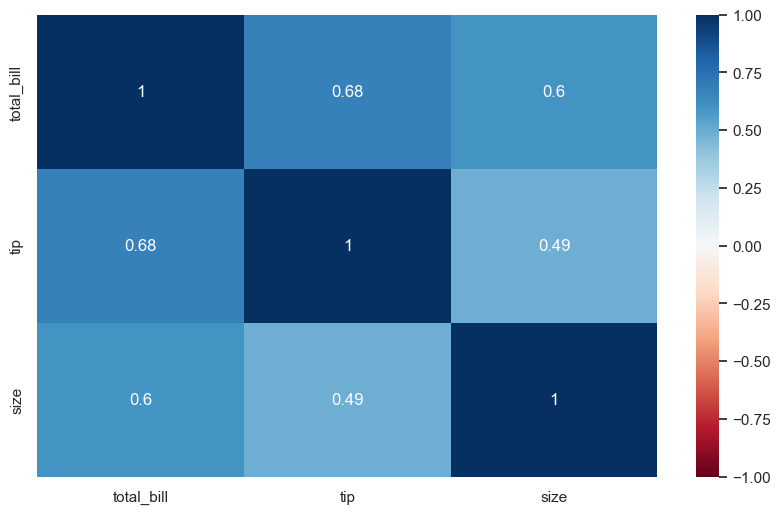

In [6]:
ax = sns.heatmap(
    tips.corr(numeric_only=True),
    vmin = -1, vmax = 1, center=0, annot=True, cmap = "RdBu") 

### Matriz con los Valores de Cramer

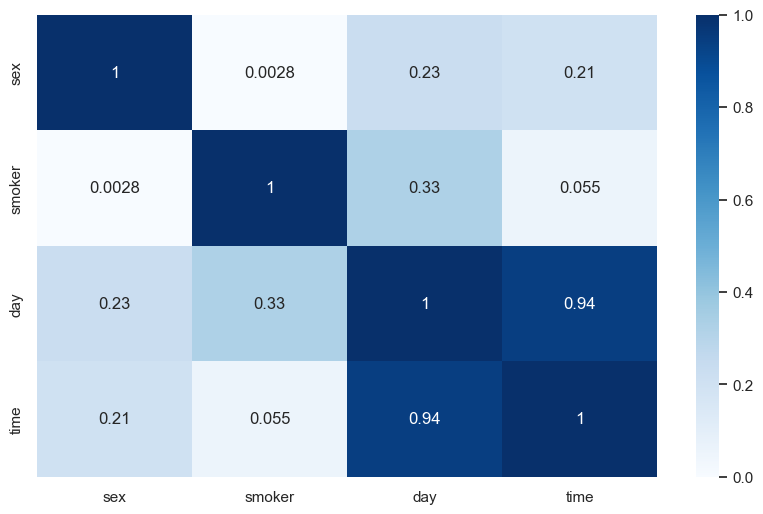

In [7]:
ax = sns.heatmap(cramers_corr(tips), vmin = 0, vmax = 1, center=0.5, annot=True, cmap = "Blues") 

### Ejemplo con la tabla pivote 

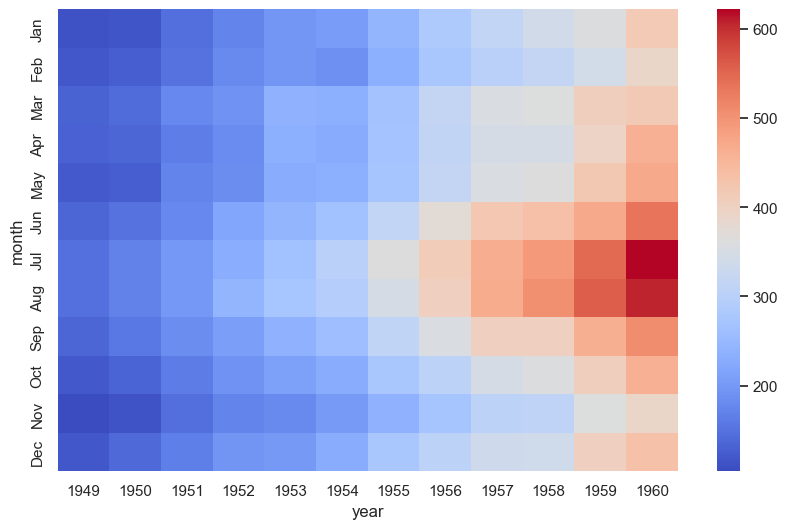

In [8]:
pivot_flights = flights.pivot_table(values='passengers',index='month',columns='year')
ax = sns.heatmap(pivot_flights, cmap = "coolwarm")

## `sns.clustermap`

La función [`sns.clustermap()`](https://seaborn.pydata.org/generated/seaborn.clustermap.html) genera un heatmap ordenando las columnas y renglones de la matriz mediante un clúster jerárquico.

Veamos cómo funciona.


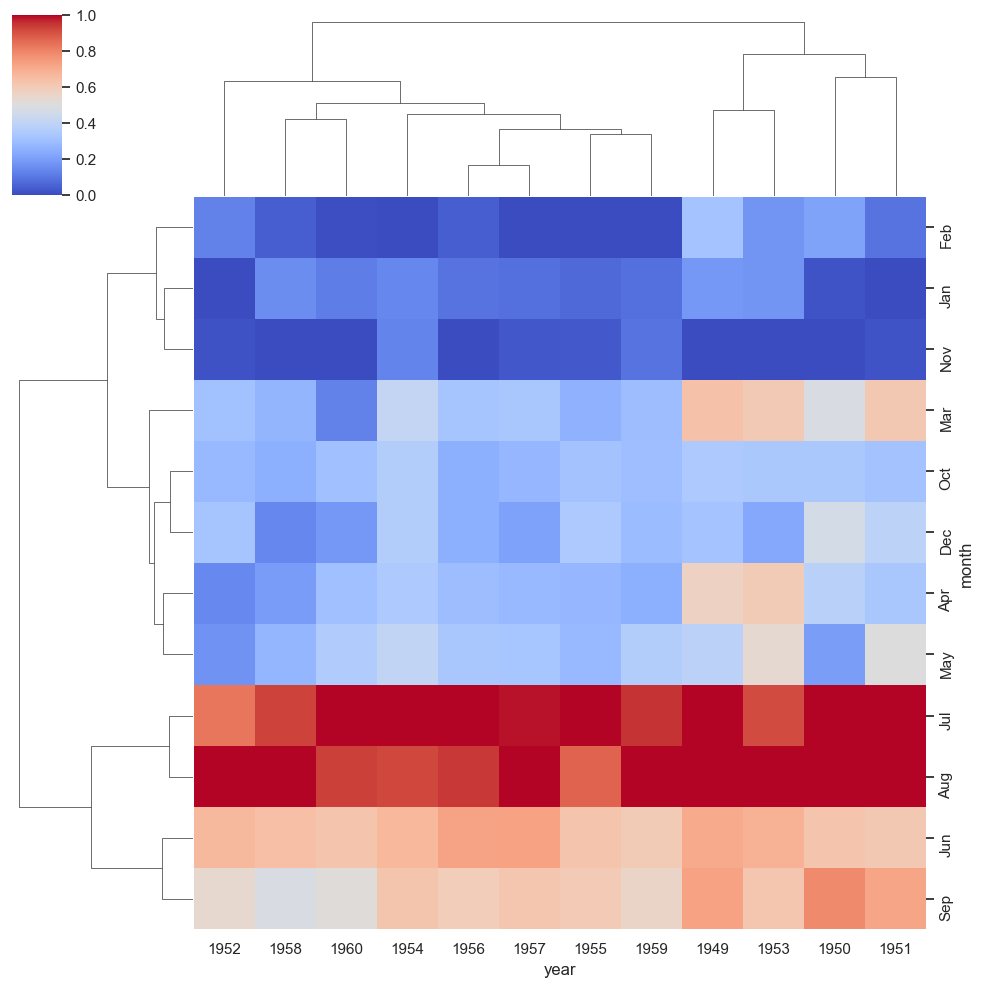

In [9]:
ax = sns.clustermap(pivot_flights, cmap = "coolwarm",standard_scale=1)